# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     |████████████████████████████████| 1.7 MB 4.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 952 kB 4.1 MB/s            
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 46.9 MB 1.7 MB/s            
     |████████████████████████████████| 8.6 MB 35.6 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080039 sha256=7503fbd55d765670227fd86503e1cc052c8ec5070e4a04fe2abacfc129d8476b
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df73511fde9af8aa747217ac8824e662037ba9a8
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you ha

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "dhanalakshmic"
kaggle_key = "658abb77a6b3e68dee35aaf0cba5ec30"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 4.93MB/s]
  0% 0.00/633k [00:00<?, ?B/s]
100% 633k/633k [00:00<00:00, 41.6MB/s]
  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 44.7MB/s]
unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('/content/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
train['datetime'] = pd.to_datetime(train['datetime'], errors='ignore')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [10]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('/content/test.csv')
test['datetime'] = pd.to_datetime(test['datetime'], errors='ignore')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [12]:
# Same thing as train and test dataset
submission = pd.read_csv('/content/sampleSubmission.csv')
submission['datetime'] = pd.to_datetime(submission['datetime'], errors='ignore')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [13]:
submission['count'].unique()

array([0])

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [14]:
train.drop(['casual','registered'], axis=1, inplace=True)

In [15]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [16]:
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20211125_151808/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211125_151808/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 9
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12670.22 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column v

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844
[6000]	train_set's rmse: 106.085	valid_set's rmse: 126.71


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3000]	train_set's rmse: 114.615	valid_set's rmse: 133.509
[4000]	train_set's rmse: 111.249	valid_set's rmse: 133.472
[5000]	train_set's rmse: 108.455	valid_set's rmse: 133.281


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.01	valid_set's rmse: 139.355
[2000]	train_set's rmse: 117.819	valid_set's rmse: 138.312
[3000]	train_set's rmse: 113.4	valid_set's rmse: 137.886
[4000]	train_set's rmse: 110.032	valid_set's rmse: 137.758


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.47	valid_set's rmse: 135.412


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.18	valid_set's rmse: 137.579
[2000]	train_set's rmse: 117.782	valid_set's rmse: 136.664
[3000]	train_set's rmse: 113.447	valid_set's rmse: 136.246
[4000]	train_set's rmse: 109.982	valid_set's rmse: 136.227


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.641	valid_set's rmse: 132.484


	-134.0883	 = Validation score   (root_mean_squared_error)
	47.56s	 = Training   runtime
	2.32s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 343.63s of the 543.65s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' arg

[1000]	train_set's rmse: 96.0217	valid_set's rmse: 123.249


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 94.7479	valid_set's rmse: 135.635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.3055	valid_set's rmse: 132.087


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.1635	valid_set's rmse: 131.521


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-132.2864	 = Validation score   (root_mean_squared_error)
	13.01s	 = Training   runtime
	0.54s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 328.55s of the 528.56s of remaining time.
	-118.4567	 = Validation score   (root_mean_squared_error)
	7.77s	 = Training   runtime

### Review AutoGluon's training run with ranking of models that did the best.

In [17]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -114.411689       7.616941  530.458898                0.000746           0.431747            3       True         20
1   NeuralNetFastAI_BAG_L2 -114.998828       6.691402  479.597255                0.403739          97.154685            2       True         18
2        LightGBMXT_BAG_L2 -115.819928       6.598072  394.346441                0.310409          11.903871            2       True         13
3          CatBoost_BAG_L2 -116.224036       6.335153  413.384284                0.047490          30.941713            2       True         16
4          LightGBM_BAG_L2 -117.080995       6.364497  389.784841                0.076834           7.342271            2       True         14
5     ExtraTreesMSE_BAG_L2 -117.519174       6.854556  390.026881         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3 -114.411689  ...       True         20
 1   NeuralNetFastAI_BAG_L2 -114.998828  ...       True         18
 2        LightGBMXT_BAG_L2 -115.819928  ...       True         13
 3          CatBoost_BAG_L2 -116.224036  ...       True         16
 4          LightGBM_BAG_L2 -117.080995  ...       True         14
 5     ExtraTreesMSE_BAG_L2 -117.519174  ...       True         17
 6           XGBoost_BAG_L2 -117.593818  ...       True         19
 7      WeightedEnsemble_L2 -118.443373  ...       True         12
 8   RandomForestMSE_BAG_L1 -118.456660  ...       True          5
 9   RandomForestMSE_BAG_L2 -119.176385  ...       True         15
 10    ExtraTreesMSE_BAG_L1 -128.733445  ...       True          7
 11         LightGBM_BAG_L1 -132.286410  ...       True          4
 12          XGBoost_BAG_L1 -132.308522  ...       True          9
 13         CatBoost_BAG_L1 -132.349692  ...   

### Create predictions from test dataset

In [18]:
predictions = predictor.predict(test)
predictions.head()

0     99.059776
1     96.731644
2     96.733406
3    108.612625
4    108.491920
Name: count, dtype: float32

In [19]:
predictions.shape

(6493,)

In [20]:
test.shape

(6493, 9)

In [21]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

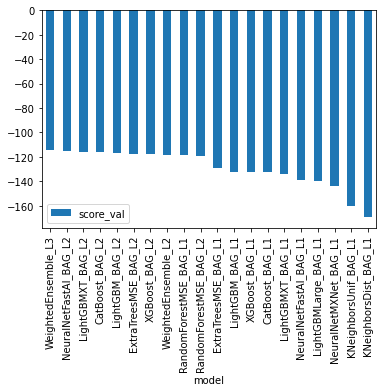

In [22]:
predictor.leaderboard(silent=True).plot(kind='bar', x='model', y='score_val')

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [23]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      212.012573
std       130.249557
min       -21.082851
25%       106.451698
50%       191.775803
75%       297.795410
max       677.753845
Name: count, dtype: float64

In [24]:
# How many negative values do we have?
predictions[predictions<0]

3393   -17.990755
5551   -21.082851
6024   -18.505482
Name: count, dtype: float32

In [25]:
# Set them to zero
predictions[predictions<0] = 0
predictions.describe()

count    6493.000000
mean      212.021439
std       130.234406
min         0.000000
25%       106.451698
50%       191.775803
75%       297.795410
max       677.753845
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [26]:
submission["count"] = predictions
submission.head()

,datetime,count
0,2011-01-20 00:00:00,99.059776
1,2011-01-20 01:00:00,96.731644
2,2011-01-20 02:00:00,96.733406
3,2011-01-20 03:00:00,108.612625
4,2011-01-20 04:00:00,108.491920


In [27]:
submission.to_csv("submission.csv", index=False)

In [28]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "raw submission"

100% 188k/188k [00:04<00:00, 40.3kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [29]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2021-11-25 15:28:49  raw submission                     complete  1.39622      1.39622       
submission_new_hpo.csv       2021-11-25 11:43:41  new features with hyperparameters  complete  0.52616      0.52616       
submission_new_features.csv  2021-11-25 11:20:40  new features                       complete  0.54073      0.54073       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b6645e890>,
      dtype=object)

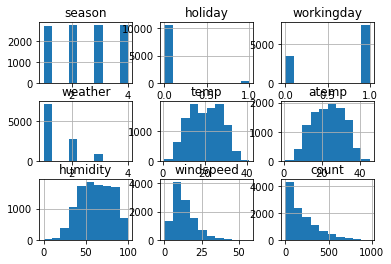

In [30]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [31]:
#Create new features from datetime and drop datetime column
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train.drop('datetime', axis=1, inplace=True)

In [32]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,1,4


In [33]:
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test.drop('datetime', axis=1, inplace=True)

In [34]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,month,hour
0,1,0,1,1,10.66,11.365,56,26.0027,20,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,20,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,20,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,20,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,20,20,4


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [35]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   count       10886 non-null  int64   
 9   day         10886 non-null  int64   
 10  month       10886 non-null  int64   
 11  hour        10886 non-null  int64   
dtypes: category(2), float64(3), int64(7)
memory usage: 872.2 KB


In [37]:
# View our new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,1,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b6b5c1fd0>,
      dtype=object)

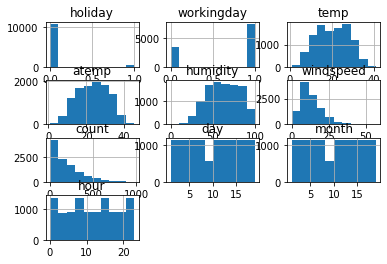

In [38]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [39]:
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20211125_152854/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211125_152854/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 11
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11503.19 MB
	Train Data (Original)  Memory Usage: 0.81 MB (0.0% of available memory)
	Inferring data type of each feature based on column 

[1000]	train_set's rmse: 49.6068	valid_set's rmse: 59.6232
[2000]	train_set's rmse: 42.1526	valid_set's rmse: 56.2143
[3000]	train_set's rmse: 37.8083	valid_set's rmse: 54.7827
[4000]	train_set's rmse: 34.6562	valid_set's rmse: 54.0087
[5000]	train_set's rmse: 32.1996	valid_set's rmse: 53.4257
[6000]	train_set's rmse: 30.1941	valid_set's rmse: 53.1765
[7000]	train_set's rmse: 28.4796	valid_set's rmse: 52.9611
[8000]	train_set's rmse: 27.0044	valid_set's rmse: 52.837
[9000]	train_set's rmse: 25.7209	valid_set's rmse: 52.7159
[10000]	train_set's rmse: 24.5623	valid_set's rmse: 52.5463


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.8067	valid_set's rmse: 63.0333
[2000]	train_set's rmse: 42.4105	valid_set's rmse: 58.7229
[3000]	train_set's rmse: 37.9961	valid_set's rmse: 56.9389
[4000]	train_set's rmse: 34.8379	valid_set's rmse: 55.9781
[5000]	train_set's rmse: 32.3777	valid_set's rmse: 55.3729
[6000]	train_set's rmse: 30.4352	valid_set's rmse: 54.9933
[7000]	train_set's rmse: 28.7466	valid_set's rmse: 54.6561
[8000]	train_set's rmse: 27.324	valid_set's rmse: 54.4916
[9000]	train_set's rmse: 26.0019	valid_set's rmse: 54.286
[10000]	train_set's rmse: 24.8545	valid_set's rmse: 54.1778


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.7213	valid_set's rmse: 58.526
[2000]	train_set's rmse: 42.3271	valid_set's rmse: 55.7489
[3000]	train_set's rmse: 37.9902	valid_set's rmse: 54.5103
[4000]	train_set's rmse: 34.8953	valid_set's rmse: 53.7153
[5000]	train_set's rmse: 32.4785	valid_set's rmse: 53.1045
[6000]	train_set's rmse: 30.4495	valid_set's rmse: 52.841
[7000]	train_set's rmse: 28.7473	valid_set's rmse: 52.7134
[8000]	train_set's rmse: 27.2819	valid_set's rmse: 52.6656
[9000]	train_set's rmse: 25.9941	valid_set's rmse: 52.5119
[10000]	train_set's rmse: 24.8075	valid_set's rmse: 52.4265


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.2347	valid_set's rmse: 65.9175
[2000]	train_set's rmse: 41.8505	valid_set's rmse: 62.8229
[3000]	train_set's rmse: 37.4715	valid_set's rmse: 61.2281
[4000]	train_set's rmse: 34.3838	valid_set's rmse: 60.394
[5000]	train_set's rmse: 31.9607	valid_set's rmse: 59.6736
[6000]	train_set's rmse: 29.9647	valid_set's rmse: 59.3411
[7000]	train_set's rmse: 28.3623	valid_set's rmse: 58.8917
[8000]	train_set's rmse: 26.9287	valid_set's rmse: 58.641
[9000]	train_set's rmse: 25.6202	valid_set's rmse: 58.3767
[10000]	train_set's rmse: 24.5068	valid_set's rmse: 58.1908


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.7284	valid_set's rmse: 58.0583
[2000]	train_set's rmse: 42.372	valid_set's rmse: 55.4343
[3000]	train_set's rmse: 37.9856	valid_set's rmse: 54.2927
[4000]	train_set's rmse: 34.9222	valid_set's rmse: 53.6051
[5000]	train_set's rmse: 32.5116	valid_set's rmse: 53.117
[6000]	train_set's rmse: 30.5427	valid_set's rmse: 52.8349
[7000]	train_set's rmse: 28.9104	valid_set's rmse: 52.63
[8000]	train_set's rmse: 27.4537	valid_set's rmse: 52.4556
[9000]	train_set's rmse: 26.1801	valid_set's rmse: 52.3861
[10000]	train_set's rmse: 25.0305	valid_set's rmse: 52.3196


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.7037	valid_set's rmse: 62.5787
[2000]	train_set's rmse: 42.1225	valid_set's rmse: 60.0997
[3000]	train_set's rmse: 37.606	valid_set's rmse: 59.0897
[4000]	train_set's rmse: 34.4246	valid_set's rmse: 58.485
[5000]	train_set's rmse: 32.0019	valid_set's rmse: 57.9051
[6000]	train_set's rmse: 29.9924	valid_set's rmse: 57.6682
[7000]	train_set's rmse: 28.3253	valid_set's rmse: 57.4858
[8000]	train_set's rmse: 26.8559	valid_set's rmse: 57.3727
[9000]	train_set's rmse: 25.5486	valid_set's rmse: 57.2845
[10000]	train_set's rmse: 24.3972	valid_set's rmse: 57.246


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 50.0347	valid_set's rmse: 60.8825
[2000]	train_set's rmse: 42.5442	valid_set's rmse: 56.8614
[3000]	train_set's rmse: 38.2204	valid_set's rmse: 55.3782
[4000]	train_set's rmse: 35.1036	valid_set's rmse: 54.5906
[5000]	train_set's rmse: 32.6783	valid_set's rmse: 54.1208
[6000]	train_set's rmse: 30.5719	valid_set's rmse: 53.8921
[7000]	train_set's rmse: 28.8385	valid_set's rmse: 53.6811
[8000]	train_set's rmse: 27.357	valid_set's rmse: 53.5293
[9000]	train_set's rmse: 26.0358	valid_set's rmse: 53.4924
[10000]	train_set's rmse: 24.8539	valid_set's rmse: 53.4116


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.4705	valid_set's rmse: 62.0663
[2000]	train_set's rmse: 42.2241	valid_set's rmse: 59.1971
[3000]	train_set's rmse: 38.0676	valid_set's rmse: 57.793
[4000]	train_set's rmse: 34.9508	valid_set's rmse: 56.7821
[5000]	train_set's rmse: 32.5408	valid_set's rmse: 56.2014
[6000]	train_set's rmse: 30.5008	valid_set's rmse: 55.7683
[7000]	train_set's rmse: 28.8503	valid_set's rmse: 55.3643
[8000]	train_set's rmse: 27.382	valid_set's rmse: 55.126
[9000]	train_set's rmse: 26.1128	valid_set's rmse: 54.9221
[10000]	train_set's rmse: 24.9924	valid_set's rmse: 54.7739


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 49.6327	valid_set's rmse: 60.085
[2000]	train_set's rmse: 42.1972	valid_set's rmse: 57.6732
[3000]	train_set's rmse: 37.8494	valid_set's rmse: 56.5436
[4000]	train_set's rmse: 34.7327	valid_set's rmse: 55.9579
[5000]	train_set's rmse: 32.3143	valid_set's rmse: 55.6518
[6000]	train_set's rmse: 30.3077	valid_set's rmse: 55.3838
[7000]	train_set's rmse: 28.5514	valid_set's rmse: 55.1386
[8000]	train_set's rmse: 27.0711	valid_set's rmse: 55.0195
[9000]	train_set's rmse: 25.7731	valid_set's rmse: 54.9575
[10000]	train_set's rmse: 24.6325	valid_set's rmse: 54.9208


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 50.2782	valid_set's rmse: 56.707
[2000]	train_set's rmse: 42.9472	valid_set's rmse: 54.1344
[3000]	train_set's rmse: 38.5216	valid_set's rmse: 52.9615
[4000]	train_set's rmse: 35.3959	valid_set's rmse: 52.204
[5000]	train_set's rmse: 32.9888	valid_set's rmse: 51.7014
[6000]	train_set's rmse: 30.9742	valid_set's rmse: 51.4092
[7000]	train_set's rmse: 29.2649	valid_set's rmse: 51.19
[8000]	train_set's rmse: 27.809	valid_set's rmse: 51.0569
[9000]	train_set's rmse: 26.4707	valid_set's rmse: 50.9885
[10000]	train_set's rmse: 25.3383	valid_set's rmse: 50.955


	-54.1289	 = Validation score   (root_mean_squared_error)
	138.28s	 = Training   runtime
	9.34s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 230.98s of the 430.99s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 35.2328	valid_set's rmse: 55.8639
[2000]	train_set's rmse: 25.6711	valid_set's rmse: 54.1014
[3000]	train_set's rmse: 20.5485	valid_set's rmse: 53.8792


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 35.3506	valid_set's rmse: 58.101
[2000]	train_set's rmse: 25.9505	valid_set's rmse: 55.9007
[3000]	train_set's rmse: 20.807	valid_set's rmse: 55.0958
[4000]	train_set's rmse: 17.1973	valid_set's rmse: 54.9999
[5000]	train_set's rmse: 14.4093	valid_set's rmse: 54.9205
[6000]	train_set's rmse: 12.3837	valid_set's rmse: 54.9397


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 34.9451	valid_set's rmse: 56.9121
[2000]	train_set's rmse: 25.4717	valid_set's rmse: 55.2388
[3000]	train_set's rmse: 20.6358	valid_set's rmse: 54.7003


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 34.7239	valid_set's rmse: 64.13
[2000]	train_set's rmse: 25.7489	valid_set's rmse: 62.9583
[3000]	train_set's rmse: 20.384	valid_set's rmse: 62.2456
[4000]	train_set's rmse: 16.8364	valid_set's rmse: 62.0596
[5000]	train_set's rmse: 14.3222	valid_set's rmse: 61.8545
[6000]	train_set's rmse: 12.2832	valid_set's rmse: 61.7203
[7000]	train_set's rmse: 10.5908	valid_set's rmse: 61.7281


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 35.825	valid_set's rmse: 57.6358
[2000]	train_set's rmse: 26.0127	valid_set's rmse: 55.766
[3000]	train_set's rmse: 20.782	valid_set's rmse: 55.5688
[4000]	train_set's rmse: 17.233	valid_set's rmse: 55.5548


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 34.8502	valid_set's rmse: 62.5523
[2000]	train_set's rmse: 25.8954	valid_set's rmse: 61.2276
[3000]	train_set's rmse: 20.4349	valid_set's rmse: 60.7924
[4000]	train_set's rmse: 16.6142	valid_set's rmse: 60.6612


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 34.8529	valid_set's rmse: 59.8971
[2000]	train_set's rmse: 25.8188	valid_set's rmse: 58.807
[3000]	train_set's rmse: 20.5536	valid_set's rmse: 58.5023


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 35.1895	valid_set's rmse: 56.727
[2000]	train_set's rmse: 26.3045	valid_set's rmse: 55.1843
[3000]	train_set's rmse: 21.0975	valid_set's rmse: 54.6948
[4000]	train_set's rmse: 17.3862	valid_set's rmse: 54.2701
[5000]	train_set's rmse: 14.7586	valid_set's rmse: 54.127
[6000]	train_set's rmse: 12.6297	valid_set's rmse: 54.0872
[7000]	train_set's rmse: 10.9084	valid_set's rmse: 54.1107


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 35.4731	valid_set's rmse: 60.1504
[2000]	train_set's rmse: 26.1079	valid_set's rmse: 58.3763
[3000]	train_set's rmse: 20.7276	valid_set's rmse: 57.8321
[4000]	train_set's rmse: 16.9851	valid_set's rmse: 57.6636
[5000]	train_set's rmse: 14.1769	valid_set's rmse: 57.395
[6000]	train_set's rmse: 12.135	valid_set's rmse: 57.4304


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 35.081	valid_set's rmse: 54.1321
[2000]	train_set's rmse: 25.9741	valid_set's rmse: 52.9496
[3000]	train_set's rmse: 20.8115	valid_set's rmse: 52.5664


	-56.4237	 = Validation score   (root_mean_squared_error)
	63.15s	 = Training   runtime
	3.2s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 156.33s of the 356.34s of remaining time.
	-65.5736	 = Validation score   (root_mean_squared_error)
	8.87s	 = Training   runtime
	0.52s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 146.13s of the 346.14s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 129.91s of the 329.92s of remaining time.
	-65.0711	 = Validation score   (root_mean_squared_error)
	4.16s	 = Training   runtime
	0.52s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 124.38s of the 324.39s of remaining time.
	Ran out of time, stopping training early. (Stopping on epoch 18)
	Ran out of time, stopping training early. (Stopping on epoch 19)
	Ran out of time, stopping training early. 

In [40]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -51.749326      16.209617  513.228709                0.000769           0.416214            3       True         16
1          CatBoost_BAG_L2  -52.363570      14.445665  380.663654                0.074056          49.226687            2       True         12
2     ExtraTreesMSE_BAG_L2  -52.376957      14.966413  338.503080                0.594804           7.066112            2       True         13
3   NeuralNetFastAI_BAG_L2  -52.571851      14.795233  424.888454                0.423625          93.451487            2       True         14
4          LightGBM_BAG_L2  -52.681389      14.515851  338.665368                0.144243           7.228400            2       True         10
5   RandomForestMSE_BAG_L2  -52.895205      14.972121  355.839809         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3  -51.749326  ...       True         16
 1          CatBoost_BAG_L2  -52.363570  ...       True         12
 2     ExtraTreesMSE_BAG_L2  -52.376957  ...       True         13
 3   NeuralNetFastAI_BAG_L2  -52.571851  ...       True         14
 4          LightGBM_BAG_L2  -52.681389  ...       True         10
 5   RandomForestMSE_BAG_L2  -52.895205  ...       True         11
 6      WeightedEnsemble_L2  -53.446168  ...       True          8
 7        LightGBMXT_BAG_L2  -53.943735  ...       True          9
 8        LightGBMXT_BAG_L1  -54.128877  ...       True          3
 9          LightGBM_BAG_L1  -56.423680  ...       True          4
 10    ExtraTreesMSE_BAG_L1  -65.071120  ...       True          6
 11  RandomForestMSE_BAG_L1  -65.573644  ...       True          5
 12  NeuralNetFastAI_BAG_L1  -70.756443  ...       True          7
 13          XGBoost_BAG_L2  -84.603401  ...   

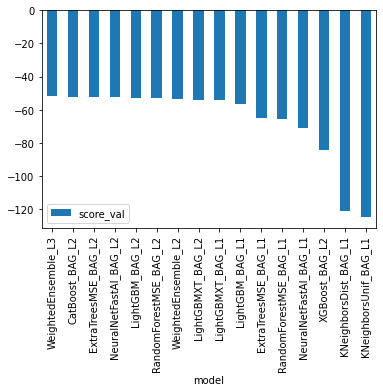

In [41]:
predictor_new_features.leaderboard(silent=True).plot(kind='bar', x='model', y='score_val')

In [42]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)

In [43]:
predictions_new_features[predictions_new_features<0]

27     -2.813348
118    -1.199173
119    -0.454346
120    -2.420935
165    -0.548049
166    -2.733645
167    -2.886425
371    -2.741175
699    -0.497556
3084   -0.732523
3296   -0.156050
3297   -2.451656
3298   -1.948594
3299   -0.197029
3322   -2.313462
3607   -2.523089
4183   -1.690287
6376   -1.578342
6473   -2.019367
Name: count, dtype: float32

In [44]:
predictions_new_features[predictions_new_features<0] = 0

In [45]:
submission_new_features = pd.read_csv('/content/submission.csv')

In [46]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [47]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:05<00:00, 35.8kB/s]
Successfully submitted to Bike Sharing Demand

In [48]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2021-11-25 15:40:27  new features                       complete  0.54724      0.54724       
submission.csv               2021-11-25 15:28:49  raw submission                     complete  1.39622      1.39622       
submission_new_hpo.csv       2021-11-25 11:43:41  new features with hyperparameters  complete  0.52616      0.52616       


#### New Score of `0.54435`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [49]:
import autogluon.core as ag

nn_options = {
    'num_epochs': 10,
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),
}

gbm_options = {
    'num_boost_round': 100,
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),
}

hyperparameters = {
                   'GBM': gbm_options,
                   'NN': nn_options,  
                  } 

time_limit = 10*60
num_trials = 5
search_strategy = 'auto'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [50]:
predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=train, time_limit=time_limit,
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211125_154030/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211125_154030/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 11
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11468.5 MB
	Train Data (Original)  Memory Usage: 0.81 MB (0.0% of available memory)
	Inferring data type of each feature based on column v

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

  0%|          | 0/5 [00:00<?, ?it/s]

	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L1/T0 ...
	-136.7041	 = Validation score   (root_mean_squared_error)
	10.22s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T0 ... Training model for up to 383.77s of the 583.79s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eva

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

  0%|          | 0/5 [00:00<?, ?it/s]

	Ran out of time, stopping training early. (Stopping on epoch 6)
	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L2/T0 ...
	-105.3177	 = Validation score   (root_mean_squared_error)
	7.25s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T0 ... Training model for up to 247.83s of the 247.81s of remaining time.
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
/usr/local/lib/python3.7

In [51]:
# hyperparameters = {'XGB': {'n_estimators': 50, 'n_jobs':-1},
#                    'KNN': {'n_neighbours':50},
#                    'NN': {'num_epochs': 20}, 
#                    'GBM': {'num_boost_round': 20}}

In [52]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -65.991310      11.674181  430.644439                0.000777           0.412214            3       True         14
1         LightGBM_BAG_L2/T3  -66.105057       9.070649  327.957637                0.138369           4.523988            2       True         11
2         LightGBM_BAG_L2/T2  -66.131817       9.063509  327.942033                0.131229           4.508384            2       True         10
3         LightGBM_BAG_L2/T4  -66.162963       9.067993  327.968820                0.135713           4.535171            2       True         12
4         LightGBM_BAG_L2/T0  -66.279165       9.069302  327.918281                0.137021           4.484632            2       True          8
5         LightGBM_BAG_L1/T4  -66.974533       0.433412   11.3

{'leaderboard':                        model   score_val  ...  can_infer  fit_order
 0        WeightedEnsemble_L3  -65.991310  ...       True         14
 1         LightGBM_BAG_L2/T3  -66.105057  ...       True         11
 2         LightGBM_BAG_L2/T2  -66.131817  ...       True         10
 3         LightGBM_BAG_L2/T4  -66.162963  ...       True         12
 4         LightGBM_BAG_L2/T0  -66.279165  ...       True          8
 5         LightGBM_BAG_L1/T4  -66.974533  ...       True          5
 6        WeightedEnsemble_L2  -66.974533  ...       True          7
 7         LightGBM_BAG_L1/T1  -67.322828  ...       True          2
 8         LightGBM_BAG_L1/T3  -67.399382  ...       True          4
 9         LightGBM_BAG_L1/T0  -67.415321  ...       True          1
 10        LightGBM_BAG_L1/T2  -68.085338  ...       True          3
 11        LightGBM_BAG_L2/T1  -71.727530  ...       True          9
 12  NeuralNetMXNet_BAG_L2/T0  -90.116837  ...       True         13
 13  NeuralNetMXNet

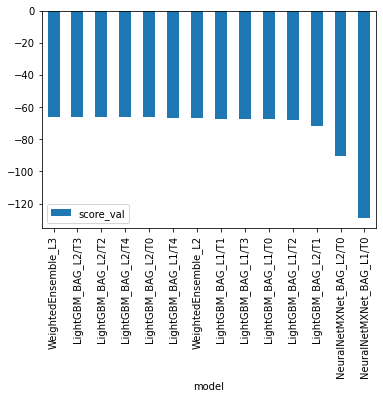

In [53]:
predictor_new_hpo.leaderboard(silent=True).plot(kind='bar', x='model', y='score_val')

In [54]:
predictions_new_hpo = predictor_new_hpo.predict(test)

In [55]:
predictions_new_hpo[predictions_new_hpo<0]

Series([], Name: count, dtype: float32)

In [56]:
predictions_new_hpo.head()

0    21.412050
1    11.339705
2    10.387093
3    10.235108
4    10.250186
Name: count, dtype: float32

In [57]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo<0] = 0

In [58]:
submission_new_hpo = pd.read_csv('/content/submission.csv')

In [59]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [60]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:04<00:00, 40.4kB/s]
Successfully submitted to Bike Sharing Demand

In [61]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2021-11-25 15:48:44  new features with hyperparameters  complete  0.53401      0.53401       
submission_new_features.csv  2021-11-25 15:40:27  new features                       complete  0.54724      0.54724       
submission.csv               2021-11-25 15:28:49  raw submission                     complete  1.39622      1.39622       


In [62]:
predictor_new_hpo.get_model_best()

'WeightedEnsemble_L3'

#### New Score of `0.52616`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

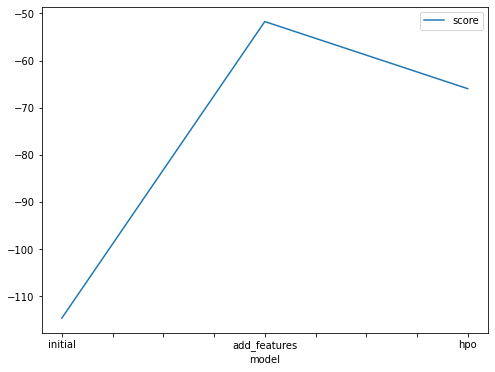

In [63]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-114.606267, -51.737171, -65.965138]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

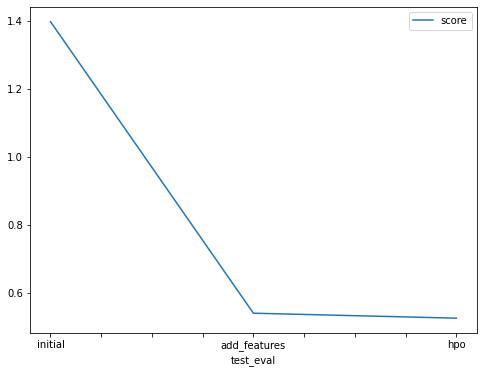

In [64]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.39764, 0.54073, 0.52616]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [65]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [None, None, 'GBM'],
    "hpo2": [None, None, 'NN'],
    "hpo3": [None, None, None],
    "score": [1.39764, 0.54073, 0.52616]
})

,model,hpo1,hpo2,hpo3,score
0,initial,None,None,None,1.39764
1,add_features,None,None,None,0.54073
2,hpo,GBM,NN,None,0.52616
